# **Limpieza de datos**

### En este archivo visualizaremos, limpiaremos y analizaremos los datos de la carpeta data.

Comenzamos importando todas las dependecias necesarias para el correcto funcionamiento del documento, aunque primero hay que asegurarnos que las tenemos instaladas.

In [ ]:
# Instalamos librerías
%pip install pandas
%pip install numpy
%pip install matplotlib

In [ ]:
# Importamos librerías
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

El siguiente paso es cargar los datos.

In [81]:
# Cargamos los datos
equipos = pd.read_csv('../data/equipos.csv')
overall = pd.read_csv('../data/overall.csv')
partidos = pd.read_csv('../data/partidos.csv')

Ahora iremos analizando tabla por tabla.

## Tabla Equipos

Comenzamos mostrando su dimensión y sus primeras filas para ver que información contiene.

In [82]:
print(equipos.shape)
equipos.head()

(640, 17)


,Season,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR
0,2022-2023,nlAjax,19,26.4,53.2,6,66,540,6.0,11,9,20,10,1,1,15.0,1.0
1,2022-2023,esAtlético Madrid,22,28.6,56.5,6,66,540,6.0,4,3,7,4,0,2,11.0,0.0
2,2022-2023,esBarcelona,26,26.4,64.8,6,66,540,6.0,12,10,22,12,0,0,9.0,0.0
3,2022-2023,deBayern Munich,24,26.6,56.1,10,110,900,10.0,21,19,40,20,1,1,20.0,1.0
4,2022-2023,ptBenfica,24,26.0,52.9,10,110,900,10.0,25,16,41,20,5,5,19.0,0.0


Vemos que tenemos una tabla con 16 columnas y 640 filas. Hablemos de lo que es cada columna:
- 'Season' nos dice de qué temporada es el dato.
- 'Squad' es el nombre del equipo de fútbol.
- '# Pl' es el número de jugadores que se han usado en los partidos.
- 'Age' nos dice la edad media de los jugadores del equipo.
- 'Poss' es la posesión del equipo de la pelota, que se calcula como el porcentaje de intentos de pasos.
- 'MP' es el número de partidos jugados.
- 'Starts' son los partidos empezados por el jugador.
- 'Min' son los minutos que ha jugado el equipo.
- '90s' es el número de minutos jugados partido de 90.
- 'Gls' son los goles marcados o permitidos.
- 'Ast' asistencias (pase que un jugador realiza a un compañero de equipo y que resulta en un gol).
- 'G + A', goles y asistencias.
- 'G - PK' nos dice los goles que no vienen de penales.
- 'PK' son los goles que sí que vienen de penales.
- 'PKatt' nos dice cuales son los tiros que han hecho por penales (cuenta los que han sido gol y los que no).
- 'CrdY', las tarjetas amarillas que ha tenido el equipo a lo largo del campeonato. 
- 'CrdR', las tarjetas rojas que ha tenido el equipo a lo largo del campeonato.

Una vez vista la información que contiene esta tabla, veamos si tiene datos nulos y si el tipo de datos de cada columna es el correcto.

In [83]:
equipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Season  640 non-null    object 
 1   Squad   640 non-null    object 
 2   # Pl    640 non-null    int64  
 3   Age     640 non-null    float64
 4   Poss    288 non-null    float64
 5   MP      640 non-null    int64  
 6   Starts  640 non-null    int64  
 7   Min     288 non-null    object 
 8   90s     288 non-null    float64
 9   Gls     640 non-null    int64  
 10  Ast     640 non-null    int64  
 11  G+A     640 non-null    int64  
 12  G-PK    640 non-null    int64  
 13  PK      640 non-null    int64  
 14  PKatt   640 non-null    int64  
 15  CrdY    576 non-null    float64
 16  CrdR    576 non-null    float64
dtypes: float64(5), int64(9), object(3)
memory usage: 85.1+ KB


Vemos que hay algunas columnas que tienen más de la mitad de los valores nulos. Vamos a borrarlas.

In [84]:
equipos = equipos.drop(columns=['Poss', 'Min', '90s'])
equipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Season  640 non-null    object 
 1   Squad   640 non-null    object 
 2   # Pl    640 non-null    int64  
 3   Age     640 non-null    float64
 4   MP      640 non-null    int64  
 5   Starts  640 non-null    int64  
 6   Gls     640 non-null    int64  
 7   Ast     640 non-null    int64  
 8   G+A     640 non-null    int64  
 9   G-PK    640 non-null    int64  
 10  PK      640 non-null    int64  
 11  PKatt   640 non-null    int64  
 12  CrdY    576 non-null    float64
 13  CrdR    576 non-null    float64
dtypes: float64(3), int64(9), object(2)
memory usage: 70.1+ KB


Podemos cambiar las columnas objeto (Season y Squad) a str.

In [86]:
# Pasamos a string
equipos['Season'] = equipos['Season'].astype('string')
equipos['Squad'] = equipos['Squad'].astype('string')

# Nos aseguramos de que se hayan hecho los cambios correctamente
equipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Season  640 non-null    string 
 1   Squad   640 non-null    string 
 2   # Pl    640 non-null    int64  
 3   Age     640 non-null    float64
 4   MP      640 non-null    int64  
 5   Starts  640 non-null    int64  
 6   Gls     640 non-null    int64  
 7   Ast     640 non-null    int64  
 8   G+A     640 non-null    int64  
 9   G-PK    640 non-null    int64  
 10  PK      640 non-null    int64  
 11  PKatt   640 non-null    int64  
 12  CrdY    576 non-null    float64
 13  CrdR    576 non-null    float64
dtypes: float64(3), int64(9), string(2)
memory usage: 70.1 KB


Lo siguiente que podemos hacer es ver que en la columna de 'Squad' aparece junto al nombre del equipo una abreviatura del país al que pertece. No nos interesa tenerlo en este formato, así que vamos a iterar sobre los valores de esta columna, eliminar la abreviatura de este país y añadir una nueva columna al lado que sea indique el país al que pertenece el equipo. Haremos esto haciendo uso del siguiente diccionario.

In [87]:
# Creamos un diccionario con los paises y sus abreviaturas
paises_dict = {
    'Alemania': 'de',
    'España': 'es',
    'Inglaterra': 'eng',
    'Italia': 'it',
    'Francia': 'fr',
    'Países bajos': 'nl',
    'Portugal': 'pt',
    'Bélgica': 'be',
    'Escocia': 'sct',
    'Irlanda': 'ie',
    'Gales': 'wal',
    'República checa': 'cz',
    'Polonia': 'pl',
    'Suiza': 'ch',
    'Austria': 'at',
    'Dinamarca': 'dk',
    'Suecia': 'se',
    'Noruega': 'no',
    'Eslovenia': 'si',
    'Eslovaquia': 'sk',
    'Hungría': 'hu',
    'Rumanía': 'ro',
    'Bulgaria': 'bg',
    'Croacia': 'hr',
    'Serbia': 'rs',
    'Grecia': 'gr',
    'Moldavia': 'md',
    'Chipre': 'cy',
    'Rusia': 'ru',
    'Bielorrusia': 'by',
    'Ucrania': 'ua',
    'Turquía': 'tr',
    'Israel': 'il',
    'Azerbaiyán': 'az',
    'Kazajistán': 'kz'
}

# Donde almacenaremos los paises para agregar al dataframe como nueva columna
paises = []

# Iteramos sobre la columna 'Squad'
for i, equipo in enumerate(equipos['Squad']):
    # Iteramos sobre el diccionario de paises
    for key, value in paises_dict.items():
        # Si el nombre del equipo comienza o termina con el valor del diccionario
        if equipo.startswith(value) or equipo.endswith(value):
            equipos.loc[i, 'Squad'] = equipo.replace(value, '')
            paises.append(key)
            break
    else:
        print('error', equipo)

# Agregamos la columna 'Country' al dataframe en la posición 2
equipos.insert(2, 'Country', paises)

# Nos aseguramos de que se haya agregado correctamente
equipos.head()

,Season,Squad,Country,# Pl,Age,MP,Starts,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR
0,2022-2023,Ajax,Países bajos,19,26.4,6,66,11,9,20,10,1,1,15.0,1.0
1,2022-2023,Atlético Madrid,España,22,28.6,6,66,4,3,7,4,0,2,11.0,0.0
2,2022-2023,Barcelona,España,26,26.4,6,66,12,10,22,12,0,0,9.0,0.0
3,2022-2023,Bayern Munich,Alemania,24,26.6,10,110,21,19,40,20,1,1,20.0,1.0
4,2022-2023,Benfica,Portugal,24,26.0,10,110,25,16,41,20,5,5,19.0,0.0


Una vez limpio el dataset, hagamos unas gráficas.

Por ejemplo, veamos que país es el que marca más goles. Podríamos hacer lo mismo con equipos en vez de países, pero son muchos equipos diferentes lo cual podría dificultar la visibilidad de la gráfica. 

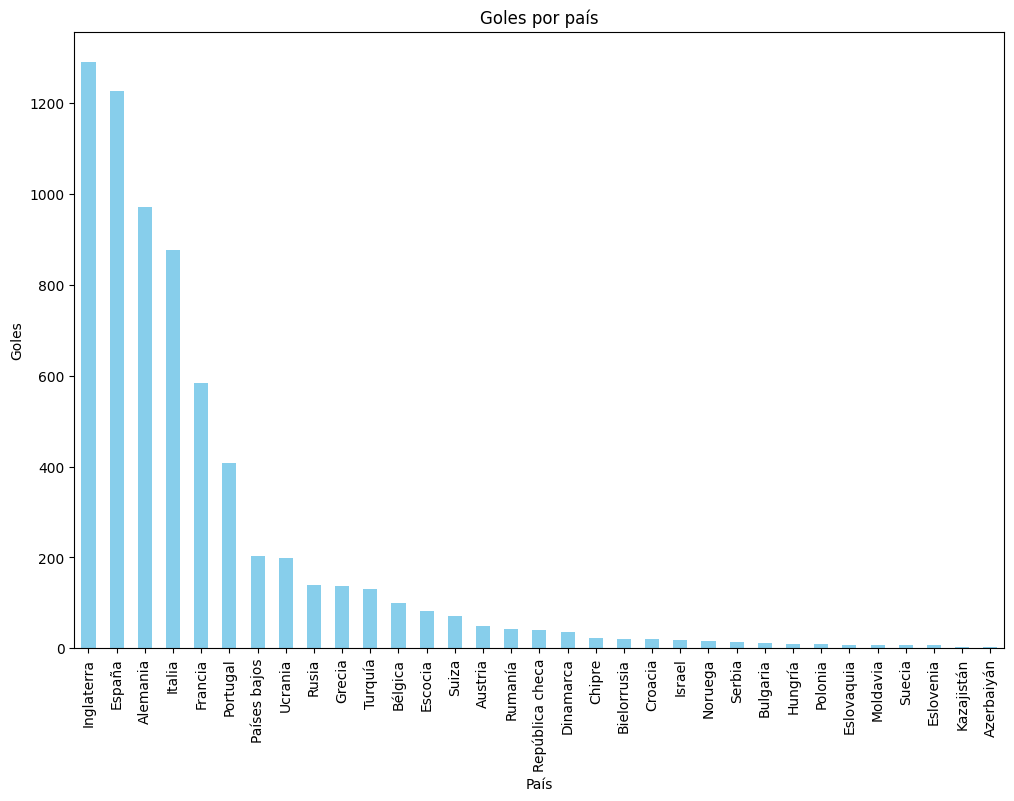

In [89]:
# Primero agrupamos por país 
goles_por_pais = equipos.groupby('Country')['Gls'].sum().sort_values(ascending=False)

# Graficamos
plt.figure(figsize=(12, 8))
goles_por_pais.plot(kind='bar', color='skyblue')
plt.title('Goles por país')
plt.xlabel('País')
plt.ylabel('Goles')
plt.show()

Podemos hacer lo mismo con la edad, las tarjetas rojas y las tarjetas amarillas.

In [ ]:
# Primero agrupamos 
edad_por_pais = equipos.groupby('Country')['Age'].sum().sort_values(ascending=False)
crdy_por_pais = equipos.groupby('Country')['CrdY'].sum().sort_values(ascending=False)
crdr_por_pais = equipos.groupby('Country')['CrdR'].sum().sort_values(ascending=False)

# Graficamos
fg, ax = plt.subplots(3, 1, figsize=(12, 24))

ax[0].plot(edad_por_pais, kind='bar', color='lightgreen')
ax[0].set_title('Edad promedio por país')
ax[0].set_xlabel('País')
ax[0].set_ylabel('Edad')

ax[1].plot(crdy_por_pais, kind='bar', color='lightyellow')
ax[1].set_title('Tarjetas amarillas por país')
ax[1].set_xlabel('País')
ax[1].set_ylabel('Tarjetas amarillas')

ax[2].plot(crdr_por_pais, kind='bar', color='lightcoral')
ax[2].set_title('Tarjetas rojas por país')
ax[2].set_xlabel('País')
ax[2].set_ylabel('Tarjetas rojas')

plt.tight_layout()
plt.show()